# Problem Defination and Solution Engineering##

In [655]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[]})

# importing packages and setting up evaluation dataframe

In [656]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

# importing housing data for Melbourne from mid 2016-early 2018 

In [657]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [658]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.00,27247.00,34856.00,34856.00,26640.00,26631.00,26129.00,23047.00,13742.00,15551.00,26881.00,26881.00,34854.00
mean,3.03,1050173.34,11.18,3116.06,3.08,1.62,1.73,593.60,160.26,1965.29,-37.81,145.00,7572.89
std,0.97,641467.13,6.79,109.02,0.98,0.72,1.01,3398.84,401.27,37.33,0.09,0.12,4428.09
min,1.00,85000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.19,144.42,83.00
25%,2.00,635000.00,6.40,3051.00,2.00,1.00,1.00,224.00,102.00,1940.00,-37.86,144.93,4385.00
50%,3.00,870000.00,10.30,3103.00,3.00,2.00,2.00,521.00,136.00,1970.00,-37.81,145.01,6763.00
75%,4.00,1295000.00,14.00,3156.00,4.00,2.00,2.00,670.00,188.00,2000.00,-37.75,145.07,10412.00
max,16.00,11200000.00,48.10,3978.00,30.00,12.00,26.00,433014.00,44515.00,2106.00,-37.39,145.53,21650.00


   ## Clean data frame without NAN or missing values ##

In [427]:
new_df = df.dropna(axis = 0, how = 'any', inplace =False)

# dropping any rows with any missing NAN value

In [659]:
new_df.info()

# dataset reduced to 8887 observations vs 34857 in original dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 21 columns):
Suburb           8887 non-null object
Address          8887 non-null object
Rooms            8887 non-null int64
Type             8887 non-null object
Price            8887 non-null float64
Method           8887 non-null object
SellerG          8887 non-null object
Date             8887 non-null object
Distance         8887 non-null float64
Postcode         8887 non-null float64
Bedroom2         8887 non-null float64
Bathroom         8887 non-null float64
Car              8887 non-null float64
Landsize         8887 non-null float64
BuildingArea     8887 non-null float64
YearBuilt        8887 non-null float64
CouncilArea      8887 non-null object
Lattitude        8887 non-null float64
Longtitude       8887 non-null float64
Regionname       8887 non-null object
Propertycount    8887 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 1.5+ MB


In [660]:
pd.options.display.float_format = "{:.2f}".format
new_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00
mean,3.10,1092901.63,11.20,3111.66,3.08,1.65,1.69,523.48,149.31,1965.75,-37.80,144.99,7475.94
std,0.96,679381.90,6.81,112.61,0.97,0.72,0.98,1061.32,87.93,37.04,0.09,0.12,4375.02
min,1.00,131000.00,0.00,3000.00,0.00,1.00,0.00,0.00,0.00,1196.00,-38.17,144.42,249.00
25%,2.00,641000.00,6.40,3044.00,2.00,1.00,1.00,212.00,100.00,1945.00,-37.86,144.92,4382.50
50%,3.00,900000.00,10.20,3084.00,3.00,2.00,2.00,478.00,132.00,1970.00,-37.80,145.00,6567.00
75%,4.00,1345000.00,13.90,3150.00,4.00,2.00,2.00,652.00,180.00,2000.00,-37.75,145.06,10331.00
max,12.00,9000000.00,47.40,3977.00,12.00,9.00,10.00,42800.00,3112.00,2019.00,-37.41,145.53,21650.00


## Treating dataset for outliers in Price ##

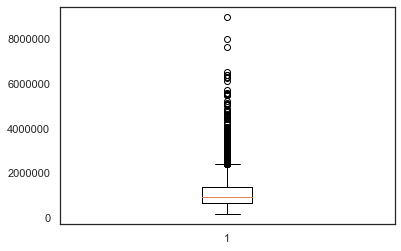

In [661]:
plt.boxplot(new_df["Price"])
plt.show()

#Box plot shows presence of outliers 

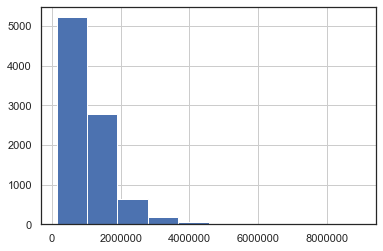

In [662]:
new_df.Price.hist()

# histogram confirming outliers 

In [663]:
print(new_df['Price'].skew())
new_df['Price'].describe()

# calculating skew in Price as is basis

2.4113965483321715


count      8887.00
mean    1092901.63
std      679381.90
min      131000.00
25%      641000.00
50%      900000.00
75%     1345000.00
max     9000000.00
Name: Price, dtype: float64

In [664]:
q1 = new_df['Price'].quantile(0.25)
q3 = new_df['Price'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-3*iqr
fence_high = q3+3*iqr
df_out = new_df.loc[(new_df['Price'] > fence_low) &(new_df['Price'] < fence_high)]


# Dropping ~ 1% of observations or 97 observations

In [665]:
print(df_out['Price'].skew())
df_out['Price'].describe()

# reduced skewness in Price

1.3522467625740107


count      8790.00
mean    1056463.34
std      577049.32
min      131000.00
25%      640000.00
50%      890000.00
75%     1325000.00
max     3450000.00
Name: Price, dtype: float64

## parsing date into 2 seperate columns - month and year - to be used for importing  benchmark bond yield dataset## 

In [666]:
df_out['year_of_sale'] = df_out['Date'].astype(str)
df_out['year_of_sale']

# creating new column with date/year

2         4/02/2016
4         4/03/2017
6         4/06/2016
11        7/05/2016
14        8/10/2016
            ...    
34847    24/02/2018
34849    24/02/2018
34853    24/02/2018
34854    24/02/2018
34856    24/02/2018
Name: year_of_sale, Length: 8790, dtype: object

In [667]:
df_out['month_of_sale'] = df_out['year_of_sale'].str[:-5]
df_out['month_of_sale'] 

2         4/02
4         4/03
6         4/06
11        7/05
14        8/10
         ...  
34847    24/02
34849    24/02
34853    24/02
34854    24/02
34856    24/02
Name: month_of_sale, Length: 8790, dtype: object

In [668]:
df_out['month'] = df_out['month_of_sale'].str[-2:]
df_out['month']


# splitting out the month

2        02
4        03
6        06
11       05
14       10
         ..
34847    02
34849    02
34853    02
34854    02
34856    02
Name: month, Length: 8790, dtype: object

In [669]:
df_out['year'] = df_out['year_of_sale'].str[-4:]

#converting date/year to year 

In [670]:
df_out['monthyear'] = pd.to_datetime(df_out[['year', 'month']].assign(Day=1))

#creating a new monthyear column in case required for further analysis

In [671]:
df_out.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,year_of_sale,month_of_sale,month,year,monthyear
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,4/02/2016,4/02,02,2016,2016-02-01
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,4/03/2017,4/03,03,2017,2017-03-01
6,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,...,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,4/06/2016,4/06,06,2016,2016-06-01
11,Abbotsford,124 Yarra St,3,h,1876000.00,S,Nelson,7/05/2016,2.50,3067.00,...,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,7/05/2016,7/05,05,2016,2016-05-01
14,Abbotsford,98 Charles St,2,h,1636000.00,S,Nelson,8/10/2016,2.50,3067.00,...,Yarra City Council,-37.81,145.00,Northern Metropolitan,4019.00,8/10/2016,8/10,10,2016,2016-10-01


In [672]:
df_out_clean = df_out.drop(columns =['Date','Type','Address','CouncilArea','Postcode', 'Lattitude', 'Longtitude', 'SellerG','Method','month_of_sale','year_of_sale'], axis=1)

# dropping irrelevant columns like Type, Address, Council Area, Postcode etc.

In [673]:
df_out_clean.head()

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,month,year,monthyear
2,Abbotsford,2,1035000.00,2.50,2.00,1.00,0.00,156.00,79.00,1900.00,Northern Metropolitan,4019.00,02,2016,2016-02-01
4,Abbotsford,3,1465000.00,2.50,3.00,2.00,0.00,134.00,150.00,1900.00,Northern Metropolitan,4019.00,03,2017,2017-03-01
6,Abbotsford,4,1600000.00,2.50,3.00,1.00,2.00,120.00,142.00,2014.00,Northern Metropolitan,4019.00,06,2016,2016-06-01
11,Abbotsford,3,1876000.00,2.50,4.00,2.00,0.00,245.00,210.00,1910.00,Northern Metropolitan,4019.00,05,2016,2016-05-01
14,Abbotsford,2,1636000.00,2.50,2.00,1.00,2.00,256.00,107.00,1890.00,Northern Metropolitan,4019.00,10,2016,2016-10-01


## Importing benchmark bond yield data to complete dataframe##

In [674]:
int_rate_df = pd.read_csv('IRLTLT01AUM156N.csv')
int_rate_df.head()

# importing bond yields for corresponding period from https://fred.stlouisfed.org/series/IRLTLT01AUM156N 

,DATE,IRLTLT01AUM156N
0,2015-09-01,2.70
1,2015-10-01,2.62
2,2015-11-01,2.85
3,2015-12-01,2.85
4,2016-01-01,2.73


In [675]:
int_rate_df = int_rate_df.rename(columns ={'IRLTLT01AUM156N': 'benchmark_bond_yields','DATE' : 'monthyear'})
int_rate_df.head()

,monthyear,benchmark_bond_yields
0,2015-09-01,2.70
1,2015-10-01,2.62
2,2015-11-01,2.85
3,2015-12-01,2.85
4,2016-01-01,2.73


In [676]:
int_rate_df['monthyear'].dtypes

dtype('O')

In [677]:
int_rate_df['monthyear'] = pd.to_datetime(int_rate_df['monthyear'])
int_rate_df['monthyear'].dtypes

# converting to datetime

dtype('<M8[ns]')

In [678]:
df_out_clean_int = pd.merge(df_out_clean, int_rate_df, left_on = ['monthyear'], right_on = ['monthyear'], how='inner')
df_out_clean_int.head()
print(df_out_clean_int.shape)

# merging dataframes

(8790, 16)


In [679]:
df_out_clean_int.head()

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,month,year,monthyear,benchmark_bond_yields
0,Abbotsford,2,1035000.00,2.50,2.00,1.00,0.00,156.00,79.00,1900.00,Northern Metropolitan,4019.00,02,2016,2016-02-01,2.48
1,Altona,2,720000.00,13.80,2.00,1.00,2.00,292.00,125.00,2013.00,Western Metropolitan,5301.00,02,2016,2016-02-01,2.48
2,Bentleigh,3,1222500.00,13.00,3.00,2.00,2.00,299.00,181.00,2000.00,Southern Metropolitan,6795.00,02,2016,2016-02-01,2.48
3,Burwood,3,1755000.00,11.70,3.00,1.00,1.00,931.00,145.00,1970.00,Southern Metropolitan,5678.00,02,2016,2016-02-01,2.48
4,Chadstone,4,890000.00,13.60,4.00,3.00,2.00,288.00,158.00,2014.00,Southern Metropolitan,3582.00,02,2016,2016-02-01,2.48


In [680]:
df_out_clean_int.columns

Index(['Suburb', 'Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Regionname', 'Propertycount',
       'month', 'year', 'monthyear', 'benchmark_bond_yields'],
      dtype='object')

In [681]:
df_out_clean_int.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,benchmark_bond_yields
count,8790.00,8790.00,8790.00,8790.00,8790.00,8790.00,8790.00,8790.00,8790.00,8790.00,8790.00
mean,3.08,1056463.34,11.24,3.06,1.63,1.68,519.90,147.34,1965.93,7477.22,2.50
std,0.96,577049.32,6.83,0.96,0.70,0.97,1065.77,85.76,36.86,4386.20,0.28
min,1.00,131000.00,0.00,0.00,1.00,0.00,0.00,0.00,1196.00,249.00,1.88
25%,2.00,640000.00,6.40,2.00,1.00,1.00,210.00,100.00,1949.00,4380.00,2.32
50%,3.00,890000.00,10.30,3.00,2.00,2.00,472.00,131.00,1970.00,6567.00,2.57
75%,4.00,1325000.00,13.90,4.00,2.00,2.00,650.00,179.00,2000.00,10331.00,2.72
max,12.00,3450000.00,47.40,12.00,9.00,10.00,42800.00,3112.00,2019.00,21650.00,2.86


## Creating new features ##

In [692]:
df_out_clean_int['cost_per_sqmts']= df_out_clean_int['Price']/df_out_clean_int['BuildingArea']
df_out_clean_int.head()

# new feature to calculate cost per sq mt of build up space

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,month,year,monthyear,benchmark_bond_yields,cost_per_sqmts
0,Abbotsford,2,1035000.00,2.50,2.00,1.00,0.00,156.00,79.00,1900.00,Northern Metropolitan,4019.00,02,2016,2016-02-01,2.48,13101.27
1,Altona,2,720000.00,13.80,2.00,1.00,2.00,292.00,125.00,2013.00,Western Metropolitan,5301.00,02,2016,2016-02-01,2.48,5760.00
2,Bentleigh,3,1222500.00,13.00,3.00,2.00,2.00,299.00,181.00,2000.00,Southern Metropolitan,6795.00,02,2016,2016-02-01,2.48,6754.14
3,Burwood,3,1755000.00,11.70,3.00,1.00,1.00,931.00,145.00,1970.00,Southern Metropolitan,5678.00,02,2016,2016-02-01,2.48,12103.45
4,Chadstone,4,890000.00,13.60,4.00,3.00,2.00,288.00,158.00,2014.00,Southern Metropolitan,3582.00,02,2016,2016-02-01,2.48,5632.91


In [699]:
df_out_clean_int['year']= pd.to_numeric(df_out_clean_int['year'], errors='coerce')

In [750]:
df_out_clean_int['age_of_property'] = df_out_clean_int['year'] - df_out_clean_int['YearBuilt']

# new feature to calculate cost age of property in year of sale 

In [751]:
df_out_clean_int['age_of_property'].describe()

# checking new feature 

count   8790.00
mean      50.70
std       35.86
min       -2.00
25%       17.00
50%       47.00
75%       68.00
max      186.00
Name: age_of_property, dtype: float64

In [752]:
df_out_clean_int.loc[df_out_clean_int['age_of_property']<0]

# locating all properties with negative age of property due to date entry errors

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,month,year,monthyear,benchmark_bond_yields,cost_per_sqmts,age_of_property
972,Newport,3,945000.00,8.40,4.00,2.00,1.00,487.00,190.00,2017.00,Western Metropolitan,5498.00,05,2016,2016-05-01,2.32,4973.68,-1.00
2310,Heidelberg,3,1030000.00,10.60,5.00,3.00,2.00,649.00,357.00,2017.00,Eastern Metropolitan,2890.00,07,2016,2016-07-01,1.93,2885.15,-1.00
2415,Brighton East,2,1310000.00,10.70,4.00,3.00,2.00,302.00,250.00,2018.00,Southern Metropolitan,6938.00,09,2016,2016-09-01,1.99,5240.00,-2.00
2700,Reservoir,4,767500.00,11.20,3.00,2.00,2.00,834.00,129.00,2017.00,Northern Metropolitan,21650.00,09,2016,2016-09-01,1.99,5949.61,-1.00
3470,Avondale Heights,3,851000.00,10.50,3.00,3.00,1.00,557.00,181.00,2017.00,Western Metropolitan,4502.00,12,2016,2016-12-01,2.79,4701.66,-1.00
3850,Keilor East,3,825000.00,12.80,3.00,2.00,1.00,630.00,126.00,2017.00,Western Metropolitan,5629.00,04,2016,2016-04-01,2.52,6547.62,-1.00
8598,Bentleigh,3,1100000.00,11.40,3.00,1.00,4.00,635.00,242.00,2019.00,Southern Metropolitan,6795.00,03,2018,2018-03-01,2.72,4545.45,-1.00


In [753]:
df_out_clean_int['age_of_property'].replace({-1.00: 0.00, -2.00: 0.00}, inplace=True)

# replaced negative values with 0 since I didnt want to lose these data points

In [754]:
df_out_clean_int['age_of_property'].describe()

# sanity check

count   8790.00
mean      50.70
std       35.86
min        0.00
25%       17.00
50%       47.00
75%       68.00
max      186.00
Name: age_of_property, dtype: float64

In [755]:
df_out_clean_int['BuildingArea'].describe()

# some building area is listed as 0

count   8790.00
mean     147.34
std       85.76
min        0.00
25%      100.00
50%      131.00
75%      179.00
max     3112.00
Name: BuildingArea, dtype: float64

In [756]:
df_out_clean_int['cost_per_sqmts'].describe()

# found inf and missing values in new feature

count   8790.00
mean        inf
std         nan
min      474.70
25%     5356.68
50%     7194.03
75%     9326.46
max         inf
Name: cost_per_sqmts, dtype: float64

In [757]:
df_out_clean_int['BuildingArea'].dtypes

# checking datatype

dtype('float64')

In [758]:
df_out_clean_int.loc[df_out_clean_int['BuildingArea']<1]

# identifying 0 values in building area which are causing INF in cost_per_sqmts column

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,month,year,monthyear,benchmark_bond_yields,cost_per_sqmts,age_of_property
185,North Melbourne,2,841000.00,2.30,2.00,1.00,1.00,215.00,0.00,2000.00,Northern Metropolitan,6821.00,03,2017,2017-03-01,2.81,inf,17.00
6217,Prahran,3,1390000.00,4.60,3.00,2.00,1.00,125.00,0.00,2002.00,Southern Metropolitan,7717.00,08,2017,2017-08-01,2.60,inf,15.00
6243,Balwyn North,5,2800000.00,9.70,5.00,2.00,2.00,1173.00,0.00,1960.00,Southern Metropolitan,7809.00,08,2017,2017-08-01,2.60,inf,57.00
6256,Brighton East,3,1650000.00,10.30,3.00,2.00,2.00,623.00,0.00,1920.00,Southern Metropolitan,6938.00,08,2017,2017-08-01,2.60,inf,97.00
6260,Bundoora,4,815000.00,12.10,4.00,2.00,1.00,525.00,0.00,1965.00,Northern Metropolitan,10175.00,08,2017,2017-08-01,2.60,inf,52.00
6273,Craigieburn,3,412500.00,20.60,3.00,2.00,1.00,197.00,0.00,2012.00,Northern Metropolitan,15510.00,08,2017,2017-08-01,2.60,inf,5.00
6280,Epping,3,595000.00,19.60,3.00,1.00,2.00,536.00,0.00,1980.00,Northern Metropolitan,10926.00,08,2017,2017-08-01,2.60,inf,37.00
6293,Glen Iris,4,2690000.00,7.30,4.00,2.00,2.00,647.00,0.00,1910.00,Southern Metropolitan,10412.00,08,2017,2017-08-01,2.60,inf,107.00
6304,Kew,5,3450000.00,5.40,5.00,2.00,2.00,668.00,0.00,2006.00,Southern Metropolitan,10331.00,08,2017,2017-08-01,2.60,inf,11.00
6306,Kilsyth,3,803000.00,26.00,3.00,1.00,2.00,862.00,0.00,1970.00,Eastern Metropolitan,4654.00,08,2017,2017-08-01,2.60,inf,47.00


In [789]:
final_df = df_out_clean_int.drop(df_out_clean_int.loc[df_out_clean_int['BuildingArea'] < 10.00].index)

# dropped 70 more observations which has less than 10 sq mts of building area

In [790]:
final_df.shape

(8711, 18)

In [791]:
final_df.head()


,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,month,year,monthyear,benchmark_bond_yields,cost_per_sqmts,age_of_property
0,Abbotsford,2,1035000.00,2.50,2.00,1.00,0.00,156.00,79.00,1900.00,Northern Metropolitan,4019.00,02,2016,2016-02-01,2.48,13101.27,116.00
1,Altona,2,720000.00,13.80,2.00,1.00,2.00,292.00,125.00,2013.00,Western Metropolitan,5301.00,02,2016,2016-02-01,2.48,5760.00,3.00
2,Bentleigh,3,1222500.00,13.00,3.00,2.00,2.00,299.00,181.00,2000.00,Southern Metropolitan,6795.00,02,2016,2016-02-01,2.48,6754.14,16.00
3,Burwood,3,1755000.00,11.70,3.00,1.00,1.00,931.00,145.00,1970.00,Southern Metropolitan,5678.00,02,2016,2016-02-01,2.48,12103.45,46.00
4,Chadstone,4,890000.00,13.60,4.00,3.00,2.00,288.00,158.00,2014.00,Southern Metropolitan,3582.00,02,2016,2016-02-01,2.48,5632.91,2.00


In [792]:
final_df['cost_per_sqmts'].describe()

# sanity check

count     8711.00
mean      7760.81
std       4551.58
min        474.70
25%       5342.17
50%       7166.67
75%       9257.32
max     110000.00
Name: cost_per_sqmts, dtype: float64

In [793]:
final_df.loc[cleanest_df['cost_per_sqmts'] ==110000.00]

# checking outlier for price - retained in data set since data entry looks alright

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,month,year,monthyear,benchmark_bond_yields,cost_per_sqmts,age_of_property
7866,Sandringham,4,2200000.00,15.20,4.00,2.00,2.00,589.00,20.00,1917.00,Southern Metropolitan,4497.00,12,2017,2017-12-01,2.58,110000.00,100.00


In [794]:
final_df.head()

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,month,year,monthyear,benchmark_bond_yields,cost_per_sqmts,age_of_property
0,Abbotsford,2,1035000.00,2.50,2.00,1.00,0.00,156.00,79.00,1900.00,Northern Metropolitan,4019.00,02,2016,2016-02-01,2.48,13101.27,116.00
1,Altona,2,720000.00,13.80,2.00,1.00,2.00,292.00,125.00,2013.00,Western Metropolitan,5301.00,02,2016,2016-02-01,2.48,5760.00,3.00
2,Bentleigh,3,1222500.00,13.00,3.00,2.00,2.00,299.00,181.00,2000.00,Southern Metropolitan,6795.00,02,2016,2016-02-01,2.48,6754.14,16.00
3,Burwood,3,1755000.00,11.70,3.00,1.00,1.00,931.00,145.00,1970.00,Southern Metropolitan,5678.00,02,2016,2016-02-01,2.48,12103.45,46.00
4,Chadstone,4,890000.00,13.60,4.00,3.00,2.00,288.00,158.00,2014.00,Southern Metropolitan,3582.00,02,2016,2016-02-01,2.48,5632.91,2.00


## Checking for Multicollinerity in features ##

In [795]:
copy_df = final_df
copy_df.head()

# creating copy of dataframe

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,month,year,monthyear,benchmark_bond_yields,cost_per_sqmts,age_of_property
0,Abbotsford,2,1035000.00,2.50,2.00,1.00,0.00,156.00,79.00,1900.00,Northern Metropolitan,4019.00,02,2016,2016-02-01,2.48,13101.27,116.00
1,Altona,2,720000.00,13.80,2.00,1.00,2.00,292.00,125.00,2013.00,Western Metropolitan,5301.00,02,2016,2016-02-01,2.48,5760.00,3.00
2,Bentleigh,3,1222500.00,13.00,3.00,2.00,2.00,299.00,181.00,2000.00,Southern Metropolitan,6795.00,02,2016,2016-02-01,2.48,6754.14,16.00
3,Burwood,3,1755000.00,11.70,3.00,1.00,1.00,931.00,145.00,1970.00,Southern Metropolitan,5678.00,02,2016,2016-02-01,2.48,12103.45,46.00
4,Chadstone,4,890000.00,13.60,4.00,3.00,2.00,288.00,158.00,2014.00,Southern Metropolitan,3582.00,02,2016,2016-02-01,2.48,5632.91,2.00


In [796]:
copy_df = copy_df.drop(['Price'], axis=1)
copy_df.head()

# dropping price from data frame

,Suburb,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,month,year,monthyear,benchmark_bond_yields,cost_per_sqmts,age_of_property
0,Abbotsford,2,2.50,2.00,1.00,0.00,156.00,79.00,1900.00,Northern Metropolitan,4019.00,02,2016,2016-02-01,2.48,13101.27,116.00
1,Altona,2,13.80,2.00,1.00,2.00,292.00,125.00,2013.00,Western Metropolitan,5301.00,02,2016,2016-02-01,2.48,5760.00,3.00
2,Bentleigh,3,13.00,3.00,2.00,2.00,299.00,181.00,2000.00,Southern Metropolitan,6795.00,02,2016,2016-02-01,2.48,6754.14,16.00
3,Burwood,3,11.70,3.00,1.00,1.00,931.00,145.00,1970.00,Southern Metropolitan,5678.00,02,2016,2016-02-01,2.48,12103.45,46.00
4,Chadstone,4,13.60,4.00,3.00,2.00,288.00,158.00,2014.00,Southern Metropolitan,3582.00,02,2016,2016-02-01,2.48,5632.91,2.00


In [797]:
corr = copy_df.corr()
corr 

# creating correlation matrix for features 

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,year,benchmark_bond_yields,cost_per_sqmts,age_of_property
Rooms,1.00,0.29,0.96,0.62,0.39,0.10,0.61,0.01,-0.08,0.19,0.15,-0.11,-0.01
Distance,0.29,1.00,0.30,0.14,0.27,0.14,0.16,0.32,-0.00,0.32,0.24,-0.35,-0.32
Bedroom2,0.96,0.30,1.00,0.62,0.40,0.10,0.60,0.02,-0.08,0.21,0.18,-0.11,-0.02
Bathroom,0.62,0.14,0.62,1.00,0.30,0.07,0.55,0.21,-0.06,0.11,0.09,-0.09,-0.21
Car,0.39,0.27,0.40,0.30,1.00,0.12,0.31,0.16,-0.03,0.16,0.11,-0.11,-0.16
Landsize,0.10,0.14,0.10,0.07,0.12,1.00,0.08,0.04,-0.03,0.08,0.07,-0.03,-0.04
BuildingArea,0.61,0.16,0.60,0.55,0.31,0.08,1.00,0.07,-0.06,0.09,0.06,-0.25,-0.07
YearBuilt,0.01,0.32,0.02,0.21,0.16,0.04,0.07,1.00,0.02,0.12,0.09,-0.37,-1.00
Propertycount,-0.08,-0.00,-0.08,-0.06,-0.03,-0.03,-0.06,0.02,1.00,0.02,0.01,-0.01,-0.02
year,0.19,0.32,0.21,0.11,0.16,0.08,0.09,0.12,0.02,1.00,0.70,-0.08,-0.10


In [798]:
abs(copy_df.corr()) > 0.65


# Checking for high multicollinearity - bedroom2 is highly correlated to Rooms

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,year,benchmark_bond_yields,cost_per_sqmts,age_of_property
Rooms,True,False,True,False,False,False,False,False,False,False,False,False,False
Distance,False,True,False,False,False,False,False,False,False,False,False,False,False
Bedroom2,True,False,True,False,False,False,False,False,False,False,False,False,False
Bathroom,False,False,False,True,False,False,False,False,False,False,False,False,False
Car,False,False,False,False,True,False,False,False,False,False,False,False,False
Landsize,False,False,False,False,False,True,False,False,False,False,False,False,False
BuildingArea,False,False,False,False,False,False,True,False,False,False,False,False,False
YearBuilt,False,False,False,False,False,False,False,True,False,False,False,False,True
Propertycount,False,False,False,False,False,False,False,False,True,False,False,False,False
year,False,False,False,False,False,False,False,False,False,True,True,False,False


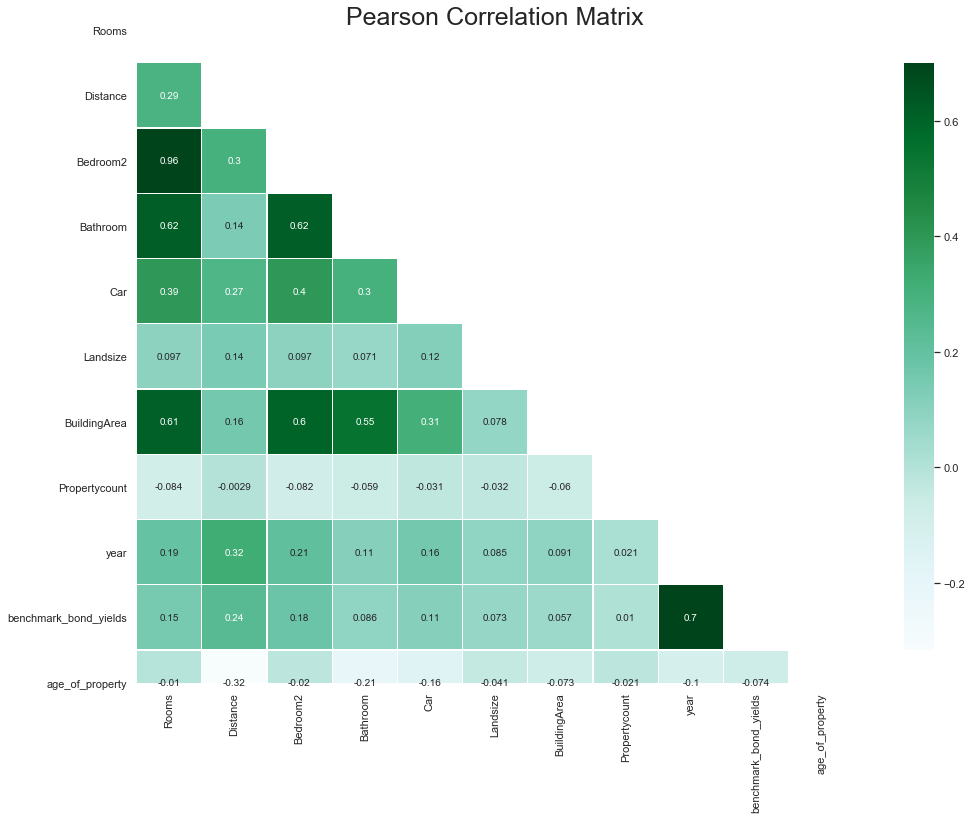

In [770]:
features = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'Regionname', 'Propertycount', 'month',
       'year', 'monthyear', 'benchmark_bond_yields','age_of_property']

mask = np.zeros_like(copy_df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(18, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(copy_df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":10},mask=mask,cbar_kws={"shrink": .9});

## Building area is closely correlated to rooms,bedroom2 and bathroom as expected, bedroom2 is highly coorelated to rooms so I will only use of these features ##

## Feature scaling and normalisation ##

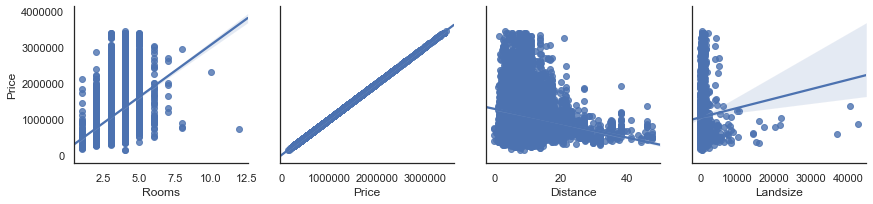

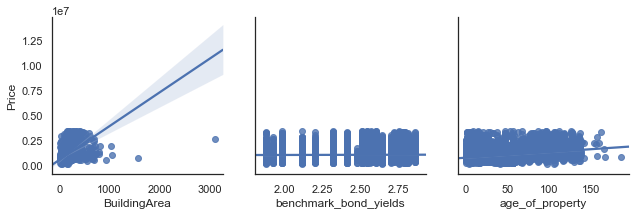

In [799]:
# sns.pairplot(df, diag_kind="kde", height=2.5)
features = ['Rooms', 'Price', 'Distance','Landsize', 'BuildingArea'
       ,'benchmark_bond_yields','age_of_property']

n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n)]
for i in row_groups:
    pp = sns.pairplot(data=final_df, y_vars=['Price'],x_vars=i, kind="reg", height=3)

In [800]:
final_df.columns

Index(['Suburb', 'Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Regionname', 'Propertycount',
       'month', 'year', 'monthyear', 'benchmark_bond_yields', 'cost_per_sqmts',
       'age_of_property'],
      dtype='object')

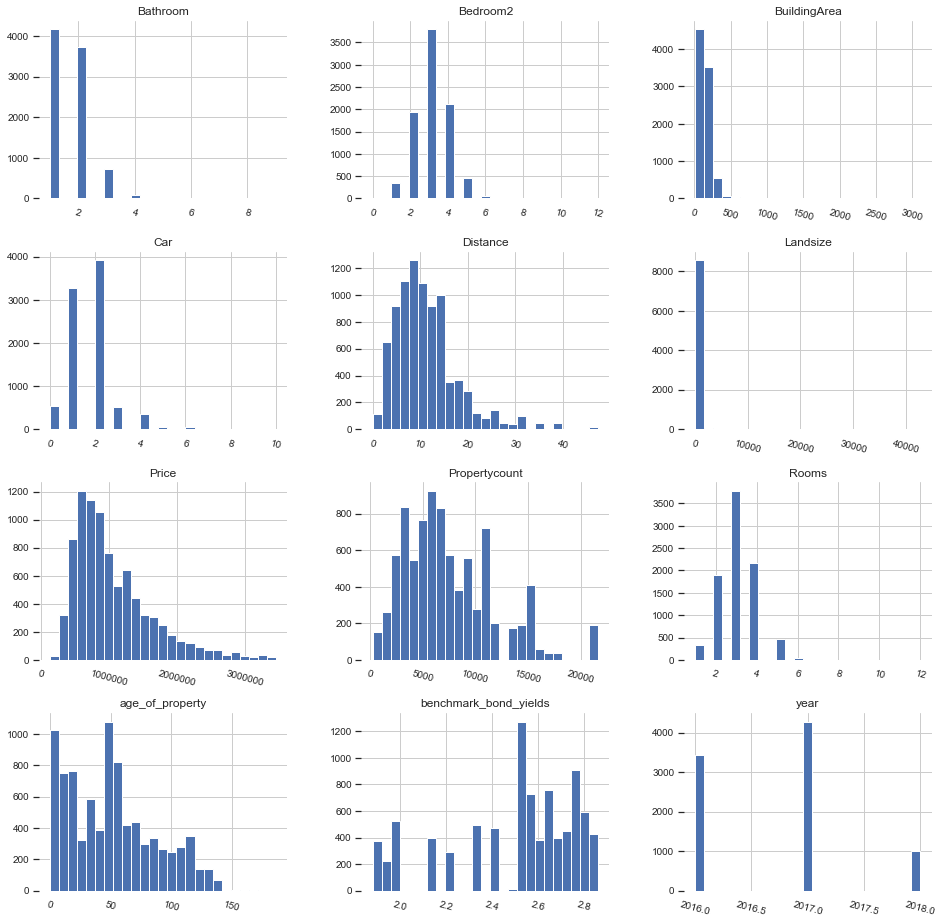

In [801]:
df1 = final_df[['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'Regionname', 'Propertycount', 'month',
       'year', 'monthyear', 'benchmark_bond_yields','age_of_property']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

# evaluting normality in features 

In [802]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [803]:
final_df['buildingarea_s'] = scaler.fit_transform(final_df[["BuildingArea"]])
final_df['landsize_s'] = scaler.fit_transform(final_df[['Landsize']])
final_df['rooms_scaled'] = scaler.fit_transform(final_df[["Rooms"]])
final_df['distance_scaled'] = scaler.fit_transform(final_df[["Distance"]])
final_df['bathroom_scaled'] = scaler.fit_transform(final_df[["Bathroom"]])

#applying standard scaler to above mentioned features 

In [804]:
dummy = pd.get_dummies(final_df['Regionname'])
dummy.shape

# converting categorical variable Region name into dummies 

(8711, 8)

In [805]:
dummy.rename(columns={'Eastern Metropolitan':'region_1', 'Eastern Victoria':'region_2', 'Northern Metropolitan':'region_3', 'Northern Victoria':'region_4','South-Eastern Metropolitan':'region_5', 'Southern Metropolitan':'region_6',
         'Western Metropolitan':'region_7', 'Western Victoria':'region_8'}, inplace = True)





In [806]:
dummy.head()

,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [807]:
final_df = pd.concat([final_df,dummy],axis=1)

# concatenating dataframe 


In [808]:
final_df.columns

Index(['Suburb', 'Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Regionname', 'Propertycount',
       'month', 'year', 'monthyear', 'benchmark_bond_yields', 'cost_per_sqmts',
       'age_of_property', 'buildingarea_s', 'landsize_s', 'rooms_scaled',
       'distance_scaled', 'bathroom_scaled', 'region_1', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8'],
      dtype='object')

In [809]:
final_df.head()

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,distance_scaled,bathroom_scaled,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8
0,Abbotsford,2,1035000.00,2.50,2.00,1.00,0.00,156.00,79.00,1900.00,...,-1.28,-0.90,0,0,1,0,0,0,0,0
1,Altona,2,720000.00,13.80,2.00,1.00,2.00,292.00,125.00,2013.00,...,0.38,-0.90,0,0,0,0,0,0,1,0
2,Bentleigh,3,1222500.00,13.00,3.00,2.00,2.00,299.00,181.00,2000.00,...,0.26,0.52,0,0,0,0,0,1,0,0
3,Burwood,3,1755000.00,11.70,3.00,1.00,1.00,931.00,145.00,1970.00,...,0.07,-0.90,0,0,0,0,0,1,0,0
4,Chadstone,4,890000.00,13.60,4.00,3.00,2.00,288.00,158.00,2014.00,...,0.35,1.94,0,0,0,0,0,1,0,0


## ANOVA and Hypothesis Testing ##

In [810]:
df_hypothesis = final_df
df_hypothesis.head()

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,distance_scaled,bathroom_scaled,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8
0,Abbotsford,2,1035000.00,2.50,2.00,1.00,0.00,156.00,79.00,1900.00,...,-1.28,-0.90,0,0,1,0,0,0,0,0
1,Altona,2,720000.00,13.80,2.00,1.00,2.00,292.00,125.00,2013.00,...,0.38,-0.90,0,0,0,0,0,0,1,0
2,Bentleigh,3,1222500.00,13.00,3.00,2.00,2.00,299.00,181.00,2000.00,...,0.26,0.52,0,0,0,0,0,1,0,0
3,Burwood,3,1755000.00,11.70,3.00,1.00,1.00,931.00,145.00,1970.00,...,0.07,-0.90,0,0,0,0,0,1,0,0
4,Chadstone,4,890000.00,13.60,4.00,3.00,2.00,288.00,158.00,2014.00,...,0.35,1.94,0,0,0,0,0,1,0,0


In [811]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [812]:
formula = 'Price ~ Rooms + Distance + BuildingArea + Landsize +  C(region_1) + C(region_2)+  C(region_3) +  C(region_4) +  C(region_5) + C(region_5) + C(region_6) + C(region_7) + C(region_8)'
lm = ols(formula, final_df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

# anova test 

                          sum_sq      df       F  PR(>F)
C(region_1)      219965020045.33    1.00    1.57    0.21
C(region_2)     7177379485229.34    1.00   51.08    0.00
C(region_3)    31599657133163.07    1.00  224.90    0.00
C(region_4)     1693185824228.34    1.00   12.05    0.00
C(region_5)    15956403895666.55    1.00  113.56    0.00
C(region_6)    29464995696923.18    1.00  209.71    0.00
C(region_7)    49778367803391.34    1.00  354.28    0.00
C(region_8)       13953515591.21    1.00    0.10    0.75
Rooms         329004950241553.12    1.00 2341.58    0.00
Distance      331365792492698.62    1.00 2358.39    0.00
BuildingArea  119222033982681.28    1.00  848.52    0.00
Landsize        4007195841393.05    1.00   28.52    0.00
Residual     1222255305107414.25 8699.00     nan     nan


In [813]:
df_hypothesis['Price'].describe()

count      8711.00
mean    1056857.00
std      576752.50
min      131000.00
25%      640000.00
50%      891000.00
75%     1325000.00
max     3450000.00
Name: Price, dtype: float64

In [814]:
average_price_region = df_hypothesis.groupby('Regionname')['Price'].mean()
average_price_region

Regionname
Eastern Metropolitan         1146347.05
Eastern Victoria              661842.78
Northern Metropolitan         878199.25
Northern Victoria             599040.32
South-Eastern Metropolitan    900776.06
Southern Metropolitan        1393627.53
Western Metropolitan          877613.12
Western Victoria              445802.33
Name: Price, dtype: float64

## More EDA ##

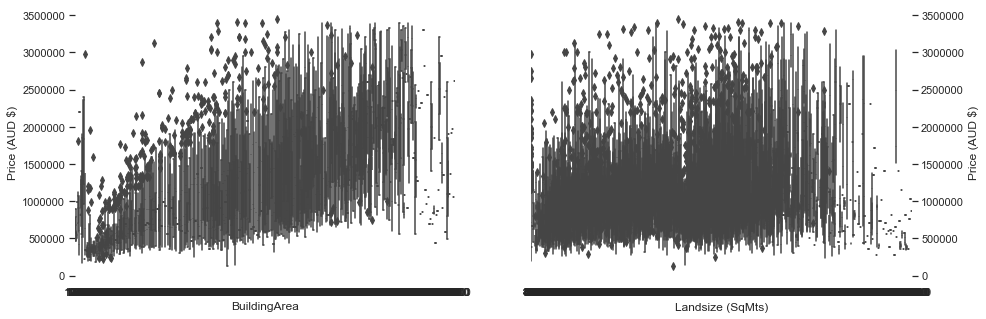

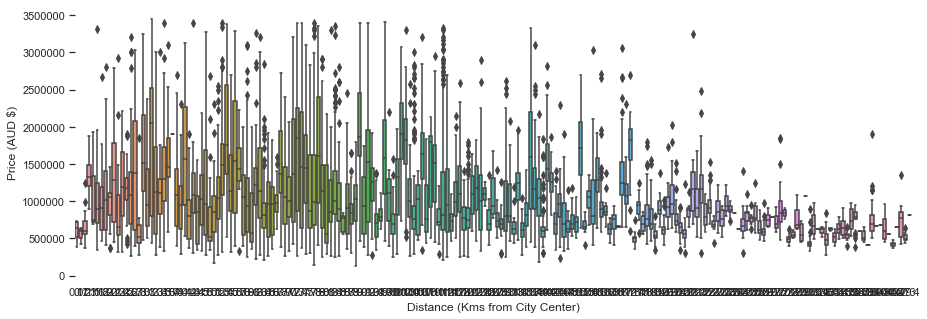

In [815]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=final_df['BuildingArea'],y=final_df['Price'], ax=axes[0])
sns.boxplot(x=final_df['Landsize'],y=final_df['Price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='BuildingArea', ylabel='Price (AUD $)')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Landsize (SqMts)', ylabel='Price (AUD $)')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=final_df['Distance'],y=final_df['Price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Distance (Kms from City Center)', ylabel='Price (AUD $)');

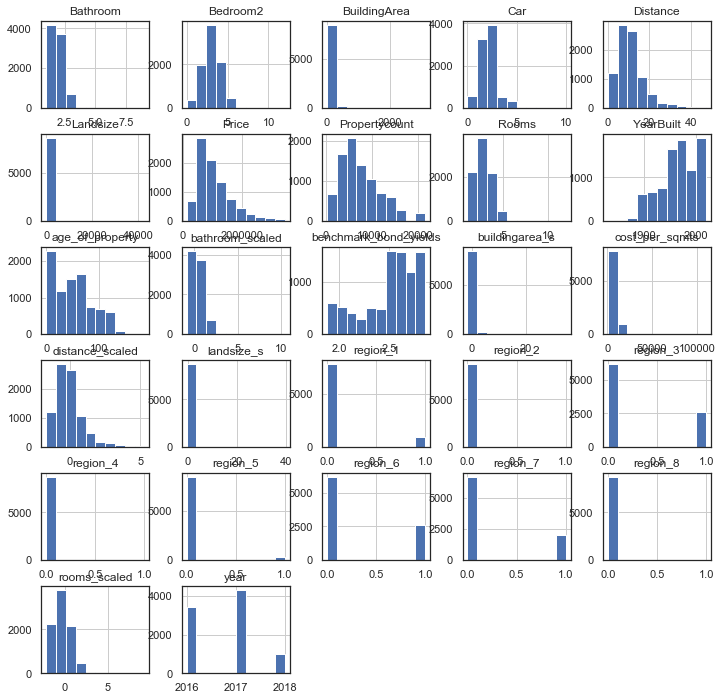

In [816]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
final_df.hist(ax = ax);

## Data Split and Simple Regression Model ##

In [818]:
train_data,test_data = train_test_split(final_df,train_size = 0.8,random_state=3)

lr = linear_model.LinearRegression()
X_train = np.array(train_data['BuildingArea'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['Price'], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data['BuildingArea'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['Price'], dtype=pd.Series)

pred = lr.predict(X_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,final_df[['BuildingArea']],final_df['Price'],cv=5).mean(),'.3f'))

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-']
evaluation

Average Price for Test Data: 1043941.464
Intercept: 572174.3458277748
Coefficient: [3260.92708565]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,Simple Linear Regression,-,491838.58,0.24,-,0.25,-


As we can see from above the liner regression model using buildingarea only explain only 24% of the variance in dependant variable - Price

Moving onto multiple regression models to better explain price

In [820]:
sns.set(style="white", font_scale=1)

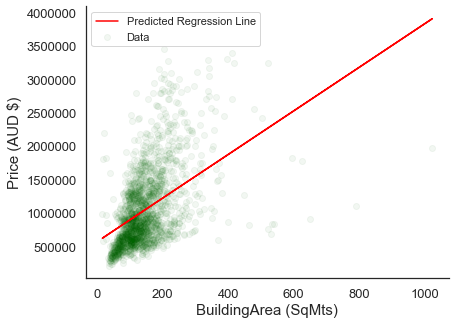

In [821]:
plt.figure(figsize=(6.5,5))
plt.scatter(X_test,y_test,color='darkgreen',label="Data", alpha=.05)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("BuildingArea (SqMts)", fontsize=15)
plt.ylabel("Price (AUD $)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

## Multiple Regression - Model 1 ##

In [822]:
final_df.columns

Index(['Suburb', 'Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Regionname', 'Propertycount',
       'month', 'year', 'monthyear', 'benchmark_bond_yields', 'cost_per_sqmts',
       'age_of_property', 'buildingarea_s', 'landsize_s', 'rooms_scaled',
       'distance_scaled', 'bathroom_scaled', 'region_1', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8'],
      dtype='object')

In [576]:
def adjustedR2(r2,n,k):
     return r2-(k-1)/(n-k)*(1-r2)

In [823]:
train_data_dm,test_data_dm = train_test_split(final_df,train_size = 0.8,random_state=3)

features = ['Rooms','Distance','BuildingArea','Bathroom','Car','age_of_property']

complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data_dm[features],train_data_dm['Price'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data_dm[features],train_data_dm['Price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data_dm[features],train_data_dm['Price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data_dm[features],test_data_dm['Price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data_dm[features],test_data['Price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,final_df[features],final_df['Price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','features',rmsecm,rtrcm,artrcm,rtecm,artecm]
evaluation.sort_values(by = 'Root Mean Squared Error (RMSE)', ascending=False)

Intercept: -38527.64329381124
Coefficients: [138916.74990204 -24246.15148502   1770.89203565 205584.83923888
  36969.49239172   5503.42695987]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,Simple Linear Regression,-,491838.58,0.24,-,0.25,-
1,Multiple Regression-1,features,379436.20,0.55,0.55,0.56,0.55


Multiple regression model 1 uses unscaled features to explain ~ 55% of the variance in Price 

## Multiple Regression - Model 2 ##

In [824]:
final_df.columns

Index(['Suburb', 'Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Regionname', 'Propertycount',
       'month', 'year', 'monthyear', 'benchmark_bond_yields', 'cost_per_sqmts',
       'age_of_property', 'buildingarea_s', 'landsize_s', 'rooms_scaled',
       'distance_scaled', 'bathroom_scaled', 'region_1', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8'],
      dtype='object')

In [825]:
features = ['buildingarea_s', 'landsize_s', 'rooms_scaled', 'distance_scaled',
       'bathroom_scaled', 'region_1', 'region_2', 'region_3', 'region_4',
       'region_5', 'region_6', 'region_7', 'region_8']

complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data_dm[features],train_data_dm['Price'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred = complex_model_2.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(train_data_dm[features],train_data_dm['Price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(train_data_dm[features],train_data_dm['Price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_2.score(test_data_dm[features],test_data_dm['Price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(test_data_dm[features],test_data['Price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_2,cleanest_df[features],cleanest_df['Price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','features',rmsecm,rtrcm,artrcm,rtecm,artecm]
evaluation.sort_values(by = 'Root Mean Squared Error (RMSE)', ascending=False)


Intercept: 1170932.0604628262
Coefficients: [ 129303.4663208    21069.36945605  233712.10068989 -271599.11916377
   51594.01910968  -44068.99528092  306731.75784054 -282164.30173185
  105380.94349194  173147.87600949  142105.39099932 -330984.21070699
  -70148.46062153]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,Simple Linear Regression,-,491838.58,0.24,-,0.25,-
1,Multiple Regression-1,features,379436.20,0.55,0.55,0.56,0.55
2,Multiple Regression-1,features,370575.26,0.58,0.58,0.58,0.57


Marginal improvement in R-squared to 58%

## Multiple Regression Model 3 ##

In [826]:
features = ['Rooms','Distance','BuildingArea','Bathroom','Car','buildingarea_s', 'landsize_s', 'rooms_scaled', 'distance_scaled',
       'bathroom_scaled', 'region_1', 'region_2', 'region_3', 'region_4',
       'region_5', 'region_6', 'region_7', 'region_8', 'age_of_property']

complex_model_3 = linear_model.LinearRegression()
complex_model_3.fit(train_data_dm[features],train_data_dm['Price'])

print('Intercept: {}'.format(complex_model_3.intercept_))
print('Coefficients: {}'.format(complex_model_3.coef_))

pred = complex_model_3.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred)),'.3f'))
rtrcm = float(format(complex_model_3.score(train_data_dm[features],train_data_dm['Price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_3.score(train_data_dm[features],train_data_dm['Price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_3.score(test_data_dm[features],test_data_dm['Price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_3.score(test_data_dm[features],test_data['Price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_3,final_df[features],final_df['Price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','features',rmsecm,rtrcm,artrcm,rtecm,artecm]
evaluation.sort_values(by = 'Root Mean Squared Error (RMSE)', ascending=False)

Intercept: 570955.5810541692
Coefficients: [ 8.40473864e+04 -2.90421717e+04  1.53408124e+03  5.03368393e+04
  4.14232677e+04  1.80490492e+01  1.74818864e+04  8.79007971e+04
 -4.24916128e+03  7.14058053e+04  1.03164264e+04  2.14397024e+05
 -2.14804147e+05  5.74337690e+04  1.32122356e+05  1.74695558e+05
 -2.54678675e+05 -1.19482311e+05  4.67218281e+03]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,Simple Linear Regression,-,491838.58,0.24,-,0.25,-
1,Multiple Regression-1,features,379436.20,0.55,0.55,0.56,0.55
2,Multiple Regression-1,features,370575.26,0.58,0.58,0.58,0.57
3,Multiple Regression-1,features,334240.79,0.65,0.65,0.66,0.65


Using scaled and unscaled features to explain ~ 65% of variance in Price 

## Regularization ##

## Ridge Regression ##

In [827]:
final_df.columns


Index(['Suburb', 'Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Regionname', 'Propertycount',
       'month', 'year', 'monthyear', 'benchmark_bond_yields', 'cost_per_sqmts',
       'age_of_property', 'buildingarea_s', 'landsize_s', 'rooms_scaled',
       'distance_scaled', 'bathroom_scaled', 'region_1', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8'],
      dtype='object')

In [832]:
features = ['Rooms','Distance','Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'Propertycount', 'benchmark_bond_yields', 'cost_per_sqmts',
       'buildingarea_s', 'landsize_s', 'rooms_scaled', 'distance_scaled',
       'bathroom_scaled', 'region_1', 'region_2', 'region_3', 'region_4',
       'region_5', 'region_6', 'region_7', 'region_8','age_of_property']

complex_model_R = linear_model.Ridge(alpha=1)
complex_model_R.fit(train_data_dm[features],train_data_dm['Price'])

pred1 = complex_model_R.predict(test_data_dm[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['Price']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['Price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['Price']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['Price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_R,final_df[features],final_df['Price'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=100)
complex_model_R.fit(train_data_dm[features],train_data_dm['Price'])

pred2 = complex_model_R.predict(test_data_dm[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['Price']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['Price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['Price']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['Price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_R,final_df[features],final_df['Price'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=1000)
complex_model_R.fit(train_data_dm[features],train_data_dm['Price'])

pred3 = complex_model_R.predict(test_data_dm[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['Price']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['Price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['Price']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['Price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_R,final_df[features],final_df['Price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge Regression','alpha=1, all features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1]
evaluation.loc[r+1] = ['Ridge Regression','alpha=100, all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2]
evaluation.loc[r+2] = ['Ridge Regression','alpha=1000, all features',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3]
evaluation.sort_values(by ='Root Mean Squared Error (RMSE)', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,Simple Linear Regression,-,491838.58,0.24,-,0.25,-
1,Multiple Regression-1,features,379436.20,0.55,0.55,0.56,0.55
2,Multiple Regression-1,features,370575.26,0.58,0.58,0.58,0.57
3,Multiple Regression-1,features,334240.79,0.65,0.65,0.66,0.65
9,Ridge Regression,"alpha=1000, all features",313859.29,0.72,0.72,0.70,0.69
8,Ridge Regression,"alpha=100, all features",309275.64,0.73,0.73,0.70,0.70
7,Ridge Regression,"alpha=1, all features",309069.17,0.73,0.73,0.70,0.70
4,Ridge Regression,"alpha=1, all features",0.00,1.00,1.00,1.00,1.00
5,Ridge Regression,"alpha=100, all features",0.00,1.00,1.00,1.00,1.00
6,Ridge Regression,"alpha=1000, all features",0.00,1.00,1.00,1.00,1.00


## Lasso Regularisation ##

In [834]:
features =  ['Rooms', 'Distance','Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'Propertycount', 'benchmark_bond_yields', 'cost_per_sqmts',
       'buildingarea_s', 'landsize_s', 'rooms_scaled', 'distance_scaled',
       'bathroom_scaled', 'region_1', 'region_2', 'region_3', 'region_4',
       'region_5', 'region_6', 'region_7', 'region_8','age_of_property']

complex_model_L = linear_model.Lasso(alpha=1)
complex_model_L.fit(train_data_dm[features],train_data_dm['Price'])

pred1 = complex_model_L.predict(test_data_dm[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['Price']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['Price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['Price']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['Price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_L,final_df[features],final_df['Price'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=100)
complex_model_L.fit(train_data_dm[features],train_data_dm['Price'])

pred2 = complex_model_L.predict(test_data_dm[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['Price']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['Price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['Price']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['Price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_L,final_df[features],final_df['Price'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=1000)
complex_model_L.fit(train_data_dm[features],train_data_dm['Price'])

pred3 = complex_model_L.predict(test_data_dm[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['Price']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['Price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['Price']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['Price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_L,final_df[features],final_df['Price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression','alpha=1, features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1]
evaluation.loc[r+1] = ['Lasso Regression','alpha=100, features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2]
evaluation.loc[r+2] = ['Lasso Regression','alpha=1000, features',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3]
evaluation.sort_values(by = 'Root Mean Squared Error (RMSE)', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,Simple Linear Regression,-,491838.58,0.24,-,0.25,-
1,Multiple Regression-1,features,379436.20,0.55,0.55,0.56,0.55
2,Multiple Regression-1,features,370575.26,0.58,0.58,0.58,0.57
3,Multiple Regression-1,features,334240.79,0.65,0.65,0.66,0.65
9,Ridge Regression,"alpha=1000, all features",313859.29,0.72,0.72,0.70,0.69
8,Ridge Regression,"alpha=100, all features",309275.64,0.73,0.73,0.70,0.70
12,Lasso Regression,"alpha=1000, features",309183.40,0.73,0.73,0.70,0.70
15,Lasso Regression,"alpha=1000, features",309183.40,0.73,0.73,0.70,0.70
10,Lasso Regression,"alpha=1, features",309073.28,0.73,0.73,0.70,0.70
13,Lasso Regression,"alpha=1, features",309073.28,0.73,0.73,0.70,0.70


## Final Model - Polynomial ##

In [835]:
evaluation_poly = pd.DataFrame({'Model': [],
                                'Details':[],
                                'Root Mean Squared Error (RMSE)':[],
                                'R-squared (training)':[],
                                'Adjusted R-squared (training)':[],
                                'R-squared (test)':[],
                                'Adjusted R-squared (test)':[],
                                '5-Fold Cross Validation':[]})

features = ['Rooms', 'Distance','Landsize', 'BuildingArea','age_of_property']

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(final_df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['Price'])

pred1 = poly.predict(X_testpoly)
rmsepoly1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['Price'],pred1)),'.3f'))
rtrpoly1 = float(format(poly.score(X_trainpoly,train_data['Price']),'.3f'))
rtepoly1 = float(format(poly.score(X_testpoly,test_data['Price']),'.3f'))
cv1 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,final_df['Price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(final_df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['Price'])

pred2 = poly.predict(X_testpoly)
rmsepoly2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['Price'],pred2)),'.3f'))
rtrpoly2 = float(format(poly.score(X_trainpoly,train_data['Price']),'.3f'))
rtepoly2 = float(format(poly.score(X_testpoly,test_data['Price']),'.3f'))
cv2 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,final_df['Price'],cv=5).mean(),'.3f'))

features = ['Rooms','Distance','Landsize', 'BuildingArea']

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(final_df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['Price'])

pred3 = poly.predict(X_testpoly)
rmsepoly3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['Price'],pred3)),'.3f'))
rtrpoly3 = float(format(poly.score(X_trainpoly,train_data['Price']),'.3f'))
rtepoly3 = float(format(poly.score(X_testpoly,test_data['Price']),'.3f'))
cv3 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,final_df['Price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(final_df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['Price'])

pred4 = poly.predict(X_testpoly)
rmsepoly4 = float(format(np.sqrt(metrics.mean_squared_error(test_data['Price'],pred4)),'.3f'))
rtrpoly4 = float(format(poly.score(X_trainpoly,train_data['Price']),'.3f'))
rtepoly4 = float(format(poly.score(X_testpoly,test_data['Price']),'.3f'))
cv4 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,final_df['Price'],cv=5).mean(),'.3f'))


features = ['Rooms', 'Distance','Landsize', 'BuildingArea','age_of_property','region_1', 'region_2', 'region_3', 'region_4', 'region_5', 'region_6',
       'region_7', 'region_8']

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(final_df[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['Price'])

pred5 = poly.predict(X_testpoly)
rmsepoly5 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred5)),'.3f'))
rtrpoly5 = float(format(poly.score(X_trainpoly,train_data_dm['Price']),'.3f'))
rtepoly5 = float(format(poly.score(X_testpoly,test_data_dm['Price']),'.3f'))
cv5 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,final_df['Price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(final_df[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Ridge(alpha=1).fit(X_trainpoly, train_data['Price'])

pred6 = poly.predict(X_testpoly)
rmsepoly6 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred6)),'.3f'))
rtrpoly6 = float(format(poly.score(X_trainpoly,train_data_dm['Price']),'.3f'))
rtepoly6 = float(format(poly.score(X_testpoly,test_data_dm['Price']),'.3f'))
cv6 = float(format(cross_val_score(linear_model.Ridge(alpha=1),X_allpoly,final_df['Price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(final_df[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Ridge(alpha=50000).fit(X_trainpoly, train_data['Price'])

pred7 = poly.predict(X_testpoly)
rmsepoly7 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred7)),'.3f'))
rtrpoly7 = float(format(poly.score(X_trainpoly,train_data_dm['Price']),'.3f'))
rtepoly7 = float(format(poly.score(X_testpoly,test_data_dm['Price']),'.3f'))
cv7 = float(format(cross_val_score(linear_model.Ridge(alpha=50000),X_allpoly,final_df['Price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(final_df[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Lasso(alpha=1).fit(X_trainpoly, train_data['Price'])

pred8 = poly.predict(X_testpoly)
rmsepoly8 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred8)),'.3f'))
rtrpoly8 = float(format(poly.score(X_trainpoly,train_data_dm['Price']),'.3f'))
rtepoly8 = float(format(poly.score(X_testpoly,test_data_dm['Price']),'.3f'))
cv8 = float(format(cross_val_score(linear_model.Lasso(alpha=1),X_allpoly,final_df['Price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(final_df[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Lasso(alpha=50000).fit(X_trainpoly, train_data['Price'])

pred9 = poly.predict(X_testpoly)
rmsepoly9 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred9)),'.3f'))
rtrpoly9 = float(format(poly.score(X_trainpoly,train_data_dm['Price']),'.3f'))
rtepoly9 = float(format(poly.score(X_testpoly,test_data_dm['Price']),'.3f'))
cv9 = float(format(cross_val_score(linear_model.Lasso(alpha=50000),X_allpoly,final_df['Price'],cv=5).mean(),'.3f'))

r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['Polynomial Regression','degree=2, selected features',rmsepoly1,rtrpoly1,'-',rtepoly1,'-',cv1]
evaluation_poly.loc[r+1] = ['Polynomial Regression','degree=3, selected features',rmsepoly2,rtrpoly2,'-',rtepoly2,'-',cv2]
evaluation_poly.loc[r+2] = ['Polynomial Regression','degree=2, all features',rmsepoly3,rtrpoly3,'-',rtepoly3,'-',cv3]
evaluation_poly.loc[r+3] = ['Polynomial Regression','degree=3, all features',rmsepoly4,rtrpoly4,'-',rtepoly4,'-',cv4]
evaluation_poly.loc[r+4] = ['Polynomial Regression','degree=2, all features',rmsepoly5,rtrpoly5,'-',rtepoly5,'-',cv5]
evaluation_poly.loc[r+5] = ['Polynomial Ridge Regression','alpha=1, degree=2, all features',rmsepoly6,rtrpoly6,'-',rtepoly6,'-',cv6]
evaluation_poly.loc[r+6] = ['Polynomial Ridge Regression','alpha=50000, degree=2, all features',rmsepoly7,rtrpoly7,'-',rtepoly7,'-',cv7]
evaluation_poly.loc[r+7] = ['Polynomial Lasso Regression','alpha=1, degree=2, all features',rmsepoly8,rtrpoly8,'-',rtepoly8,'-',cv8]
evaluation_poly.loc[r+8] = ['Polynomial Lasso Regression','alpha=50000, degree=2, all features',rmsepoly9,rtrpoly9,'-',rtepoly9,'-',cv9]
evaluation_poly_temp = evaluation_poly[['Model','Details','Root Mean Squared Error (RMSE)','R-squared (training)','R-squared (test)','5-Fold Cross Validation']]
evaluation_poly_temp.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
4,Polynomial Regression,"degree=2, all features",294767.84,0.74,0.73,0.51
7,Polynomial Lasso Regression,"alpha=1, degree=2, all features",294768.72,0.74,0.73,0.51
5,Polynomial Ridge Regression,"alpha=1, degree=2, all features",294715.80,0.74,0.73,0.50
0,Polynomial Regression,"degree=2, selected features",368313.77,0.60,0.58,0.41
6,Polynomial Ridge Regression,"alpha=50000, degree=2, all features",303933.08,0.72,0.71,0.38
8,Polynomial Lasso Regression,"alpha=50000, degree=2, all features",304826.01,0.72,0.71,0.37
2,Polynomial Regression,"degree=2, all features",396147.22,0.55,0.52,0.37
1,Polynomial Regression,"degree=3, selected features",345848.11,0.65,0.63,-1.22
3,Polynomial Regression,"degree=3, all features",377813.63,0.59,0.56,-6.77


# Add interpretation of top 3 co-efficients#

# Evaluation Table##

In [836]:
evaluation_temp=evaluation.append(evaluation_poly)
evaluation_temp1=evaluation_temp.sort_values(by = '5-Fold Cross Validation', ascending=False)
evaluation_temp2=evaluation_temp1.reset_index()
evaluation_f=evaluation_temp2.iloc[:,1:]
evaluation_f

,5-Fold Cross Validation,Adjusted R-squared (test),Adjusted R-squared (training),Details,Model,R-squared (test),R-squared (training),Root Mean Squared Error (RMSE)
0,0.51,-,-,"degree=2, all features",Polynomial Regression,0.73,0.74,294767.84
1,0.51,-,-,"alpha=1, degree=2, all features",Polynomial Lasso Regression,0.73,0.74,294768.72
2,0.50,-,-,"alpha=1, degree=2, all features",Polynomial Ridge Regression,0.73,0.74,294715.80
3,0.41,-,-,"degree=2, selected features",Polynomial Regression,0.58,0.60,368313.77
4,0.38,-,-,"alpha=50000, degree=2, all features",Polynomial Ridge Regression,0.71,0.72,303933.08
5,0.37,-,-,"alpha=50000, degree=2, all features",Polynomial Lasso Regression,0.71,0.72,304826.01
6,0.37,-,-,"degree=2, all features",Polynomial Regression,0.52,0.55,396147.22
7,-1.22,-,-,"degree=3, selected features",Polynomial Regression,0.63,0.65,345848.11
8,-6.77,-,-,"degree=3, all features",Polynomial Regression,0.56,0.59,377813.63
9,nan,-,-,-,Simple Linear Regression,0.25,0.24,491838.58


# Clearly the best model to explain Price is the polynomial regression model with all features #

## THE END ##